# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [1]:
import numpy as np
import pandas as pd
import funpymodeling as fp
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
from math import radians

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Imputación y codificación
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from geopy import Nominatim
from geopy.exc import GeocoderTimedOut

random_state = 0

In [2]:
# Cargar el dataset
data = pd.read_csv("data/weatherAUS.csv")

In [3]:
data.columns #V ariables en el dataset

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
data.index # Cantidad de muestras en el dataset

RangeIndex(start=0, stop=145460, step=1)

In [5]:
# Visualizar las primeras filas.
data.head(5).T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [6]:
# Identificar los tipos de datos: categórico, ordinal, etc. 
# Responder para cada variable su tipo y si es informativa para un problema de clasificación 
# (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

En base al problema planteado, la variable de salida es RainTomorrow. El resto son variables de entrada para el problema.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [8]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10), bins = 25)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

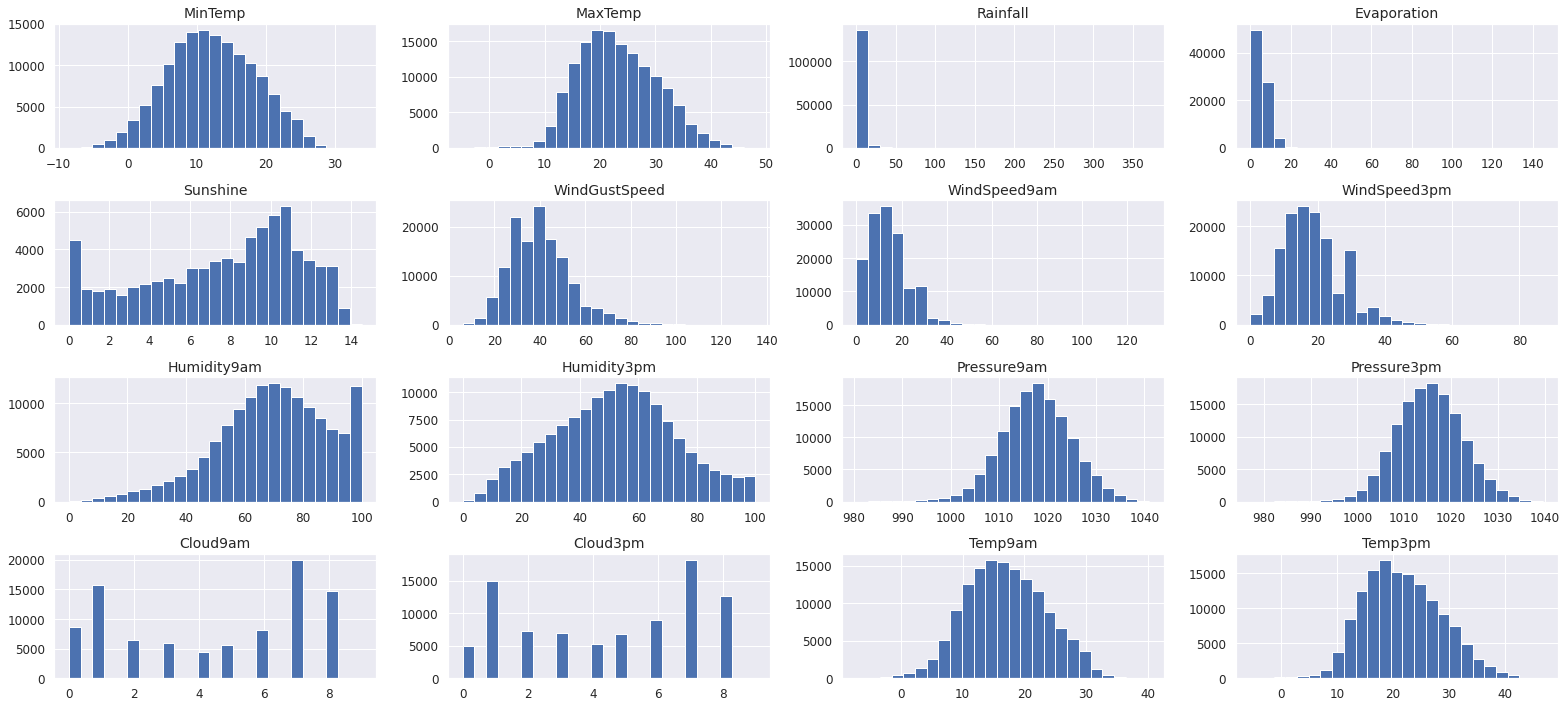

In [9]:
display_dataset_distributions(data)

<AxesSubplot:>

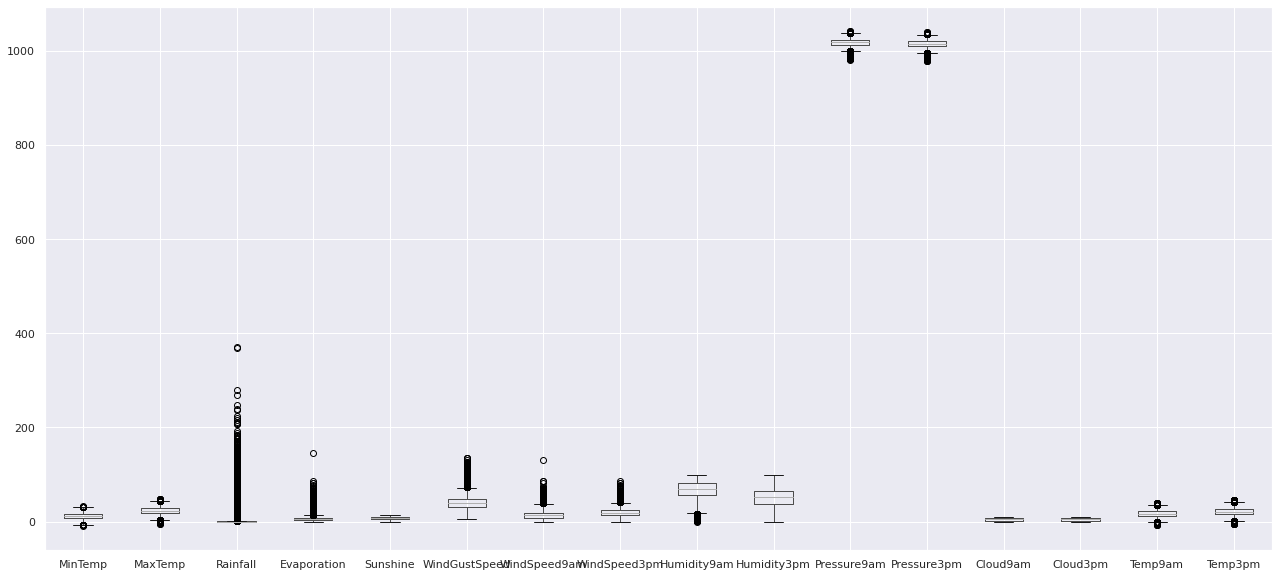

In [10]:
data.boxplot(figsize=(22,10))

Las variables Rainfall y Evaporation tienen demasiados outliers, y no cumplen con una distribucion normal. En menor medida, sucede los mismo con las variables de la velocidad del viento WindSpeed9am, WindSpeed3pm y WindGustSpeed, y la variable Sunshine. Por otro lado, las variables de nubosidad Cloud9am y Cloud 3pm tienen distribuciones normales pero compuestas por dos modos.

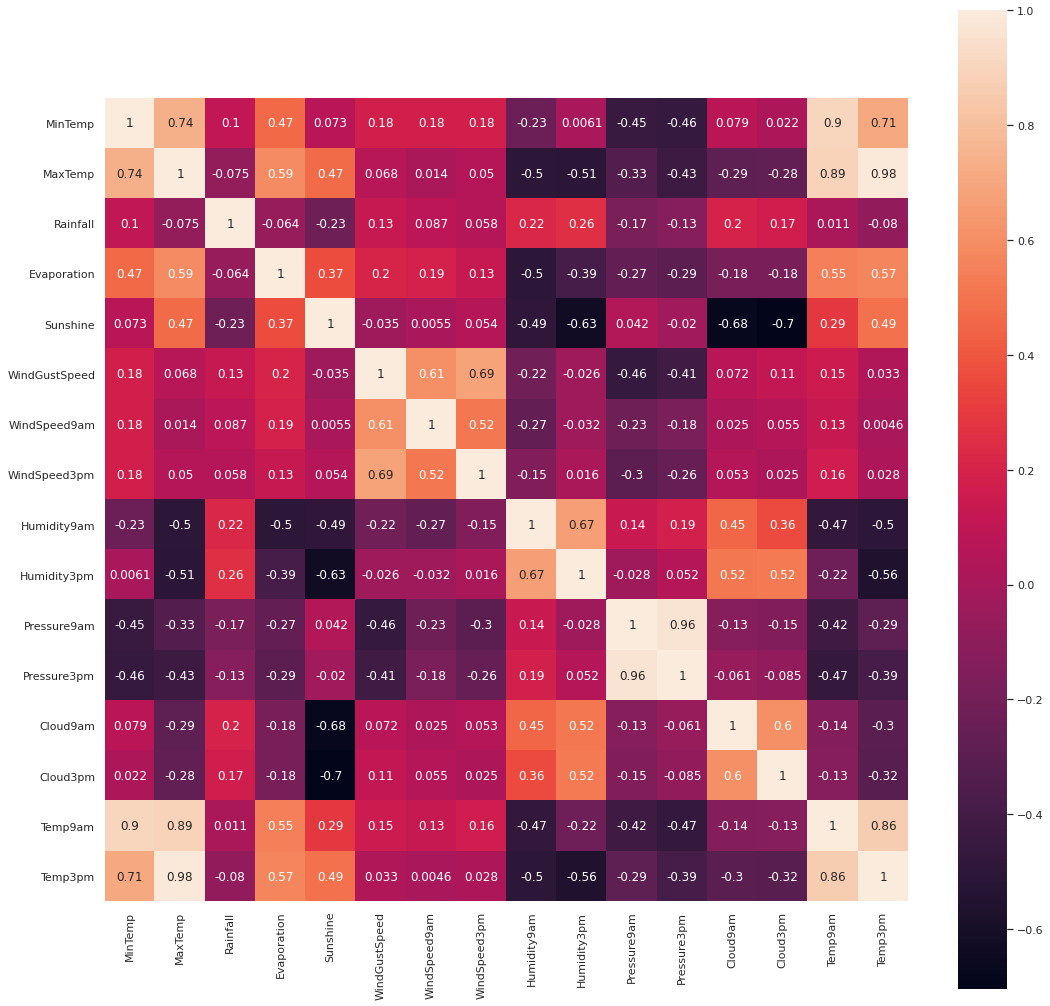

In [11]:
correlation_matrix = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(correlation_matrix,annot=True, square=True);

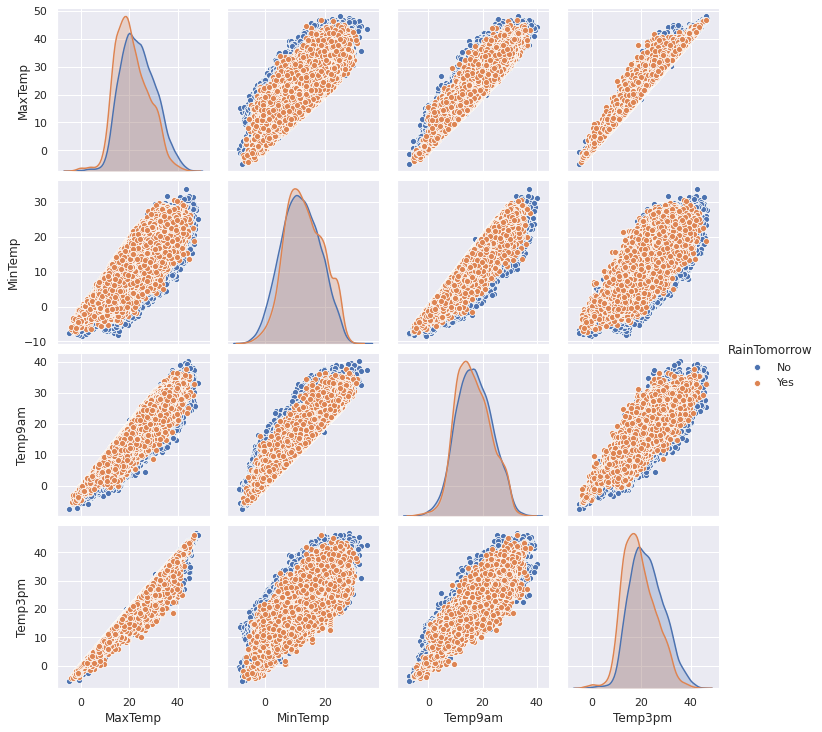

In [12]:
temp_data = pd.DataFrame(columns=['MaxTemp', 'MinTemp', 'Temp9am', 'Temp3pm'])
temp_data['MaxTemp'] = data['MaxTemp']
temp_data['MinTemp'] = data['MinTemp']
temp_data['Temp9am'] = data['Temp9am']
temp_data['Temp3pm'] = data['Temp3pm']
temp_data['RainTomorrow'] = data['RainTomorrow']


sns.pairplot(data=temp_data, hue='RainTomorrow');

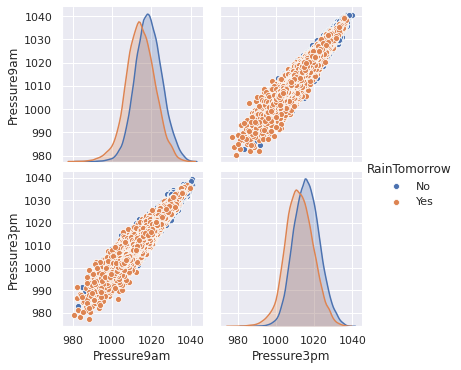

In [13]:
p_data = pd.DataFrame(columns=['Pressure9am', 'Pressure3pm'])
p_data['Pressure9am'] = data['Pressure9am']
p_data['Pressure3pm'] = data['Pressure3pm']
p_data['RainTomorrow'] = data['RainTomorrow']

sns.pairplot(data=p_data, hue='RainTomorrow');

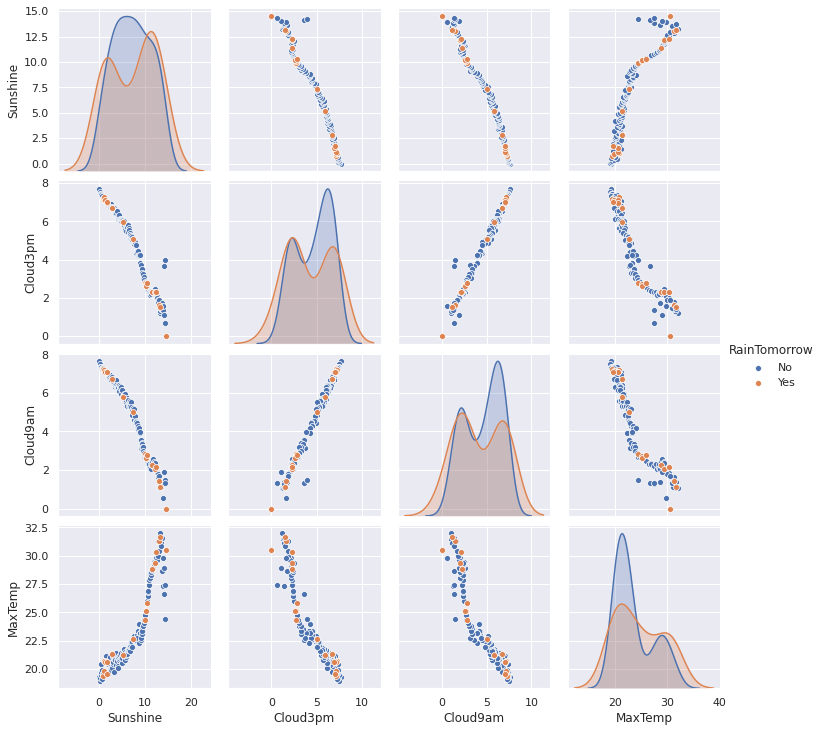

In [14]:
mask_nans = (data['Sunshine'].isna()==False) & (data['Cloud3pm'].isna()==False) & (data['Cloud9am'].isna()==False)
cloud_data = data.loc[mask_nans, ['Sunshine', 'Cloud3pm', 'Cloud9am', 'MaxTemp']].groupby('Sunshine').mean().reset_index()

cloud_data['RainTomorrow'] = data['RainTomorrow']

sns.pairplot(data=cloud_data, hue = 'RainTomorrow');

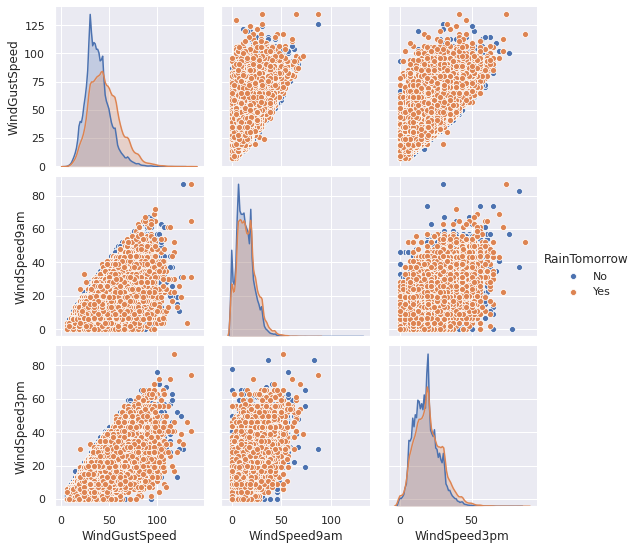

In [15]:
wind_data = pd.DataFrame(columns=['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])
wind_data['WindGustSpeed'] = data['WindGustSpeed']
wind_data['WindSpeed9am'] = data['WindSpeed9am']
wind_data['WindSpeed3pm'] = data['WindSpeed3pm']
wind_data['RainTomorrow'] = data['RainTomorrow']

sns.pairplot(data=wind_data, hue='RainTomorrow');

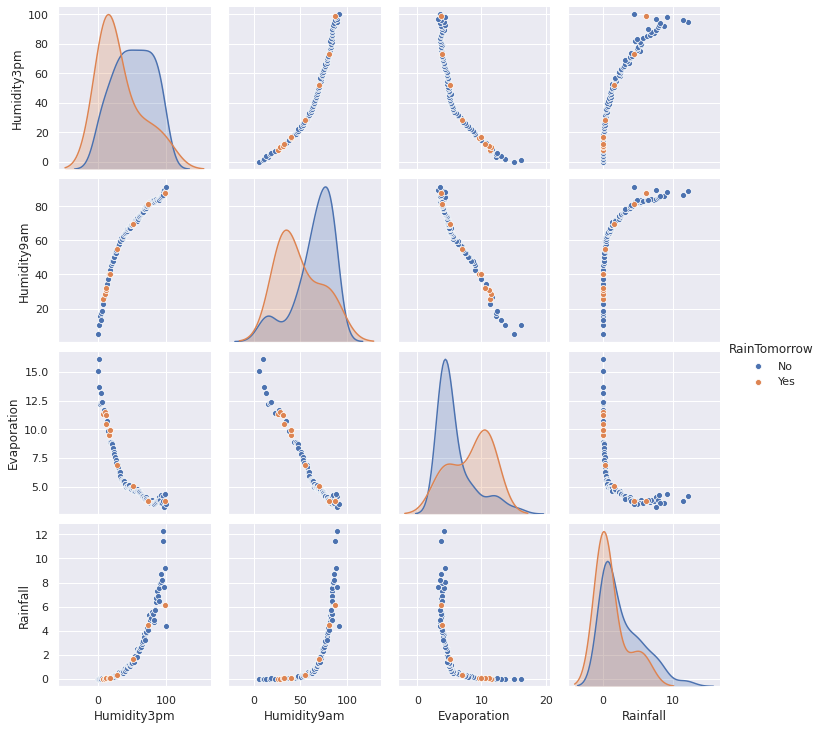

In [16]:
mask_nans = (data['Rainfall'].isna()==False) & (data['Evaporation'].isna()==False) & (data['Humidity3pm'].isna()==False) & (data['Humidity9am'].isna()==False)
humidity_data = data.loc[mask_nans, ['Humidity3pm', 'Humidity9am', 'Evaporation', 'Rainfall']].groupby('Humidity3pm').mean().reset_index()

humidity_data['RainTomorrow'] = data['RainTomorrow']


sns.pairplot(data=humidity_data, hue='RainTomorrow');

In [17]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
data.describe(include=['object']).T

,count,unique,top,freq
Date,145460,3436,2017-05-05,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


### Variables cardinales
#### Variable: RainToday
La variable RainToday da cuenta del estado del tiempo actual, en la location especificada. Yes si llueve en el dia en el que fue hecha la entrada y No si no llovio en dicha fecha.

In [19]:
print(data['RainToday'].unique())

['No' 'Yes' nan]


#### Variable: Location
La variable Location contiene informacion del nombre en el cual se recolecto la informacion del resto de las variables, siendo 49 ciudades diferentes las que conforman la lista

In [20]:
print(data['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


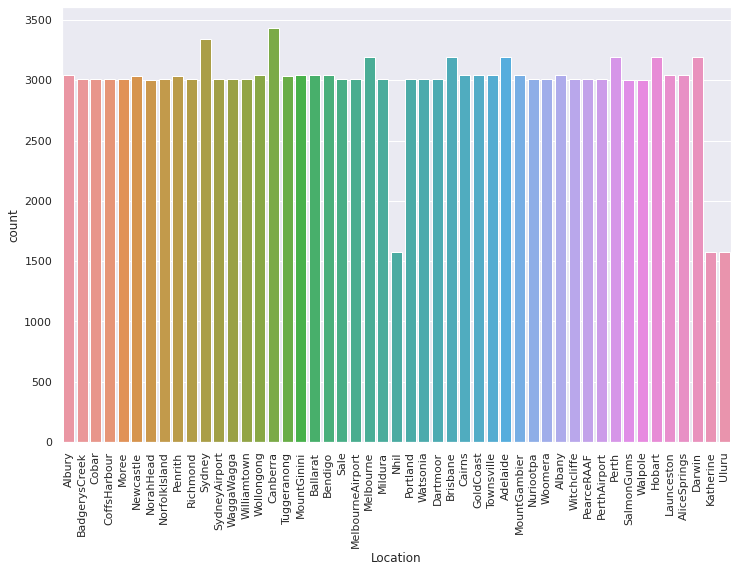

In [21]:
# Cantidad de muestras por ubicación
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(data['Location'], ax = ax)
plt.xticks(rotation=90)
plt.show()

#### Variables: WindGustDir, WindDir9am y WindDir3pm 
Junto con las variables numericas que representan su velocidad, el viento esta codificado segun su direccion en relacion a los puntos cardinales, segmentados en 16 valores diferentes.

In [22]:
print(data['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


In [23]:
print(data['WindDir9am'].unique())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']


In [24]:
print(data['WindDir3pm'].unique())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [25]:
print(data['RainToday'].unique())

['No' 'Yes' nan]


### Variables compuestas
#### Variable Date

La misma representa la fecha en la cual se han registrado el resto de las variables. Las componentes HORA, MINUTOS y SEGUNDOS no revisten importancia ya que no se han incluido sus valores al cargar los datos.

Hay diferentes formas en las que puede utilizarse el valor de Date.
Dada la periodicidad de las caracteristicas del tiempo a lo largo del año puede codificarse la fecha como ESTACION, como MES, o como DIA CALENDARIO, para capturar esta caracteristica de dicha variable. Los dos primeros casos implicaria codificar la fecha como una variable categorica, que terminaria en un One-Hot encoding, y el tercer caso podria ser codificado como una variable numerica.

Otro dato que podria ser de importancia dado los efectos del calentamiento global y el cambio climatico, es analizar la evolucion a traves de los años de los diversos climas en Australia. Para ello se podria tomar como entrada tambien el valor del año como un valor numerico como un offset a partir de un año base.

In [26]:
data.groupby('Location')['Date'].min()

Location
Adelaide            2008-07-01
Albany              2008-12-01
Albury              2008-12-01
AliceSprings        2008-12-01
BadgerysCreek       2009-01-01
Ballarat            2008-12-01
Bendigo             2008-12-01
Brisbane            2008-07-01
Cairns              2008-12-01
Canberra            2007-11-01
Cobar               2009-01-01
CoffsHarbour        2009-01-01
Dartmoor            2009-01-01
Darwin              2008-07-01
GoldCoast           2008-12-01
Hobart              2008-07-01
Katherine           2013-03-01
Launceston          2008-12-01
Melbourne           2008-07-01
MelbourneAirport    2009-01-01
Mildura             2009-01-01
Moree               2009-01-01
MountGambier        2008-12-01
MountGinini         2008-12-01
Newcastle           2008-12-01
Nhil                2013-03-01
NorahHead           2009-01-01
NorfolkIsland       2009-01-01
Nuriootpa           2009-01-01
PearceRAAF          2009-01-01
Penrith             2008-12-01
Perth               2008-07-01

In [27]:
data.groupby('Location')['Date'].max()

Location
Adelaide            2017-06-25
Albany              2017-06-25
Albury              2017-06-25
AliceSprings        2017-06-25
BadgerysCreek       2017-06-25
Ballarat            2017-06-25
Bendigo             2017-06-25
Brisbane            2017-06-25
Cairns              2017-06-25
Canberra            2017-06-25
Cobar               2017-06-25
CoffsHarbour        2017-06-25
Dartmoor            2017-06-25
Darwin              2017-06-25
GoldCoast           2017-06-25
Hobart              2017-06-25
Katherine           2017-06-25
Launceston          2017-06-25
Melbourne           2017-06-25
MelbourneAirport    2017-06-25
Mildura             2017-06-25
Moree               2017-06-25
MountGambier        2017-06-25
MountGinini         2017-06-25
Newcastle           2017-06-24
Nhil                2017-06-25
NorahHead           2017-06-25
NorfolkIsland       2017-06-25
Nuriootpa           2017-06-25
PearceRAAF          2017-06-25
Penrith             2017-06-25
Perth               2017-06-25

Se puede apreciar que el valor minimo de la variable Date depende especificamente de la Location a la que corresponde la entrada. Esto puede deberse a la fecha en la que se inicia el registro de datos en cada una de las ciudades. 

Todas las fechas finales, i.e maximas, son de identico valor.

### Variable de salida

Como era de esperarse, se puede constatar que la clase de salida no se en cuentra balanceada, teniendo los siguientes porcentajes para cada clase, con una minima cantidad de datos faltantes.

In [28]:
y = data['RainTomorrow']
print("Salida con valores positivos: {:6.0f} ({:2.2f}%)".format(y[y=='Yes'].count(),y[y=='Yes'].count()/len(y)*100))
print("Salida con valores negativos: {:6.0f} ({:2.2f}%)".format(y[y=='No'].count(),y[y=='No'].count()/len(y)*100))
print("Salida con valores faltantes: {:6.0f} ({:2.2f}%)".format(len(y)-y.count(),(len(y)-y.count())/len(y)*100))

Salida con valores positivos:  31877 (21.91%)
Salida con valores negativos: 110316 (75.84%)
Salida con valores faltantes:   3267 (2.25%)


['No' 'Yes' nan]


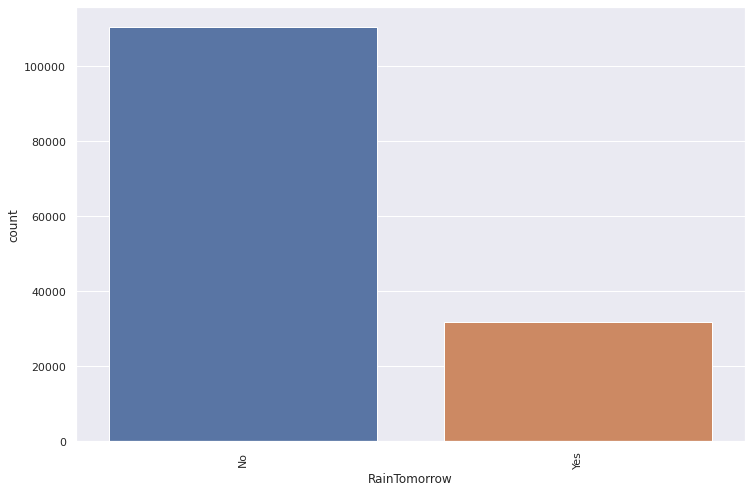

In [29]:
print(y.unique())
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(y, ax = ax)
plt.xticks(rotation=90)
plt.show()

El problema es claramente un problema de clasificacion en la cual hay dos estados posibles, llueve o no llueve. La salida 'RainTomorrow' la codificaria como una variable binaria, e.g. 0 para los casos 'No' y 1 para los casos 'Yes'.

## Esquema de validacion de resultados

A continuacion se limpian los registros en los que la salida tiene como valor NaN, y luego se particiona el dataset en variables de entrada X y variables de salida y. Luego de esta division se los divide en conjuntos de train y test, siguiendo una proporcion de 70/30.

In [30]:
# Eliminar muestras con valor de salida NaN
data_clean = data.dropna(subset=['RainTomorrow'], inplace=False)

In [31]:
# Variables de entrada
X = data_clean.drop('RainTomorrow', 1, inplace=False)

In [32]:
# Variables de salida
y = data_clean['RainTomorrow']

In [33]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = random_state)

In [34]:
def dataset_clean(data):
    data_clean = data.dropna(subset=['RainTomorrow'], inplace=False)
    X = data_clean.drop('RainTomorrow', 1, inplace=False)
    y = data_clean['RainTomorrow']
    return X, y

def dataset_split(X, y):
    return train_test_split(X, y, test_size=0.3, stratify=y, random_state = random_state)

## 3. Limpieza y preparación de datos / ingeniería de features

En primer lugar analizamos la composicion de cada una de las variables, en cuanto a valores faltantes.

In [35]:
fp.status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.000000,0,0.000000,3436,object
1,Location,0,0.000000,0,0.000000,49,object
2,MinTemp,1485,0.010209,159,0.001093,389,float64
3,MaxTemp,1261,0.008669,14,0.000096,505,float64
4,Rainfall,3261,0.022419,91080,0.626152,681,float64
5,Evaporation,62790,0.431665,244,0.001677,358,float64
6,Sunshine,69835,0.480098,2359,0.016218,145,float64
7,WindGustDir,10326,0.070989,0,0.000000,16,object
8,WindGustSpeed,10263,0.070555,0,0.000000,67,float64
9,WindDir9am,10566,0.072639,0,0.000000,16,object


In [36]:
fp.status(data)[fp.status(data)['p_nan']<0.05]['variable']

0             Date
1         Location
2          MinTemp
3          MaxTemp
4         Rainfall
10      WindDir3pm
11    WindSpeed9am
12    WindSpeed3pm
13     Humidity9am
14     Humidity3pm
19         Temp9am
20         Temp3pm
21       RainToday
22    RainTomorrow
Name: variable, dtype: object

En las variables donde tenemos a lo sumo un 5% de datos faltantes podemos aplicar una imputacion por media o medianas, teniendo asumido que los datos faltantes se deben a sucesos aleatorios (MCAR, MAR)

#### Supuestos sobre datos faltantes

In [37]:
# data.groupby('Location')['Date'].count()
data.groupby('Location').count()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3191,3190,3091,1704,1769,3167,3167,2919,3177,...,3188,3188,3185,3186,0,0,3188,3189,3091,3090
Albany,3040,2977,2986,3016,2750,2520,0,0,2793,2257,...,2991,2324,3015,3015,3002,2329,3001,2328,3016,3016
Albury,3040,3029,3029,3011,0,0,3008,3008,2515,2994,...,3031,3032,3035,3032,1289,1427,3031,3032,3011,3011
AliceSprings,3040,3039,3038,3032,2825,2520,2989,2989,2810,3036,...,3037,3035,3039,3037,2706,2679,3040,3038,3032,3031
BadgerysCreek,3009,2973,2980,2928,0,0,2933,2933,2574,2924,...,2955,2954,2841,2836,0,0,2968,2965,2928,2928
Ballarat,3040,3039,3039,3028,0,0,3009,3009,2949,3022,...,3019,3033,3016,3014,2494,1992,3028,3034,3028,3028
Bendigo,3040,3038,3035,3034,1185,0,2999,3000,2796,2997,...,3033,3038,3025,3030,2072,2268,3037,3038,3034,3034
Brisbane,3193,3184,3179,3161,3174,3144,3152,3152,3123,3159,...,3189,3178,3192,3185,3192,3191,3189,3178,3161,3161
Cairns,3040,3039,3040,2988,2670,2564,3021,3022,2997,3036,...,3039,3040,3039,3040,2833,2810,3039,3040,2988,2988


Pareciera ser que hay ciudades en las que no hay ninguna entrada de ciertas categorias. Otros casos se puede ver que hay un numero bastante uniforme de entradas en las diferentes categorias, pero que no coinciden con la moda del numero de entradas en cada ciudad.

En el primer caso, el supuesto es que dicha ciudad no cuenta con el instrumental necesario para la medicion dada.
En el segundo caso, dado que dichas ciudades coinciden con las que tienen una fecha minima mayor que el resto, segun se vio en el punto dos, se supone que son ciudades que ingresaron años mas tarde al registro de datos meteorologicos.

In [38]:
def delete_missing_values(X, y):

    idx = X.isnull().sum(axis = 1) == 0
    X = X[idx]
    y = y[idx]
    return X,y

def delete_incomplete_columns(X, cols):
    X.drop(cols, 1, inplace=True)


def impute_mode(X, cols):
    imputer = SimpleImputer(strategy='most_frequent',add_indicator=False)

    for col in cols:
        X[col] = imputer.fit_transform(X[col].values.reshape(-1, 1))
        
def impute_mean(X, cols):
    imputer = SimpleImputer(strategy='mean',add_indicator=False)

    for col in cols:
        X[col] = imputer.fit_transform(X[col].values.reshape(-1, 1))

def impute_constant(X, cols, value):
    imputer = SimpleImputer(strategy='constant', fill_value=value,add_indicator=False)

    for col in cols:
        X[col] = imputer.fit_transform(X[col].values.reshape(-1, 1))

In [39]:
X_train, y_train = delete_missing_values(X_train, y_train)

### Codificacion de las variables categoricas

#### Variable: Location

Para codificar la variable Location, podemos utilizar la API de geopy, la cual nos devuelve el valor de longitud y latitud de cada una de las ciudades (las altitudes no estan cargadas para las ciudades en cuestion).

De esta manera podemos recuperar la informacion espacial que tienen cada una de las ciudades.

In [40]:
def findGeocode(city):
    try:
        geolocator = Nominatim(user_agent="myGeocoder")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city) 
    
cities = data['Location'].unique()
latitudes = {}
longitudes = {}
for city in cities:
#         print("Getting location: "+re.sub(r"(?<![A-Z])(?<!^)([A-Z])",r" \1", city) + ' AU')
        location = findGeocode(re.sub(r"(?<![A-Z])(?<!^)([A-Z])",r" \1", city) + ' AU')
        latitudes[city]=location.latitude
        longitudes[city]=location.longitude
        

In [41]:
def encode_location(X):
    X['Latitude'] = X.apply(lambda row: latitudes[row['Location']], axis=1)
    X['Longitude'] = X.apply(lambda row: longitudes[row['Location']], axis=1)
    X.drop('Location', 1, inplace=True)
    
encode_location(X_train)

In [42]:
X_train

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Latitude,Longitude
35718,2015-04-07,15.2,24.3,2.6,3.2,9.8,NW,69.0,WNW,WNW,...,30.0,1007.8,1007.1,6.0,2.0,18.0,21.9,Yes,-33.949894,151.181968
100414,2011-06-20,8.4,14.4,7.2,0.2,0.1,NW,81.0,N,NNW,...,87.0,1003.0,997.4,8.0,8.0,12.6,13.9,Yes,-37.824670,140.782007
139141,2008-07-31,17.4,30.3,0.0,5.4,8.7,E,33.0,ENE,NNW,...,54.0,1016.7,1012.6,2.0,6.0,22.9,27.1,No,-12.460440,130.841047
104531,2014-08-30,4.4,22.3,0.0,4.8,10.0,NNW,33.0,NNE,NNW,...,29.0,1024.6,1020.5,1.0,3.0,16.1,21.8,No,-34.469335,138.993901
33760,2009-08-29,14.2,27.0,0.2,9.2,5.2,NW,74.0,N,NE,...,50.0,1008.0,998.1,7.0,5.0,17.9,22.6,No,-33.949894,151.181968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78976,2011-10-15,14.0,22.9,0.2,5.4,9.2,W,69.0,WNW,SSW,...,64.0,1007.8,1006.9,4.0,6.0,19.2,17.8,No,-37.711002,145.083635
9282,2009-08-13,8.3,21.2,0.0,2.6,10.2,SSW,28.0,W,E,...,38.0,1015.5,1012.3,0.0,0.0,18.2,20.1,No,-30.296241,153.113529
12575,2010-05-24,9.6,20.9,0.0,3.8,0.1,NNE,35.0,NE,NNW,...,62.0,1018.3,1014.8,7.0,8.0,16.0,18.8,No,-29.461720,149.840715
22420,2012-08-24,11.6,18.8,0.0,2.6,4.7,E,26.0,E,E,...,66.0,1025.5,1023.4,2.0,7.0,16.7,17.4,No,-29.028958,167.958729


#### Variable: Date

Como se mencionó anteriormente, se puede codificar la variable Date de distintas maneras. Teniendo en cuenta la ordinalidad de la fecha dentro de un ciclo anual, se pretende analizar si hace sentido utilizar una codificacion por Estacion, por Mes o por Dia.

In [43]:
data_date = data.copy()
data_date['Year'] = pd.DatetimeIndex(data['Date']).year
data_date['Month'] = pd.DatetimeIndex(data['Date']).month
data_date['Week'] = pd.DatetimeIndex(data['Date']).week
data_date['Day'] = pd.DatetimeIndex(data['Date']).day
data_date['Dayofyear'] = pd.DatetimeIndex(data['Date']).dayofyear
data_date['Quarter'] = pd.DatetimeIndex(data['Date']).quarter

<ipython-input-43-41015945e1db>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data_date['Week'] = pd.DatetimeIndex(data['Date']).week


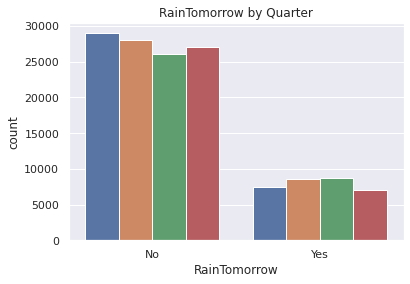

In [44]:
plot = sns.countplot(x=data_date['RainTomorrow'], hue=data_date['Quarter'])
plot.legend_.remove()
plot.set_title('RainTomorrow by Quarter');

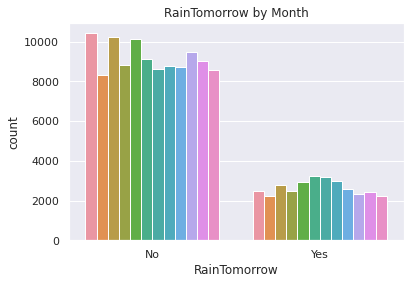

In [45]:
plot = sns.countplot(x=data_date['RainTomorrow'], hue=data_date['Month'])
plot.legend_.remove()
plot.set_title('RainTomorrow by Month');

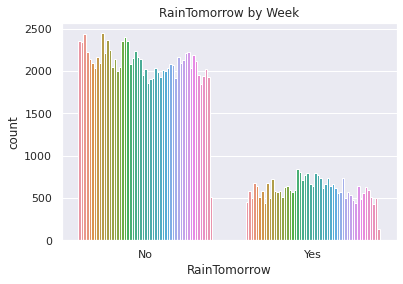

In [46]:
plot = sns.countplot(x=data_date['RainTomorrow'], hue=data_date['Week'])
plot.legend_.remove()
plot.set_title('RainTomorrow by Week');

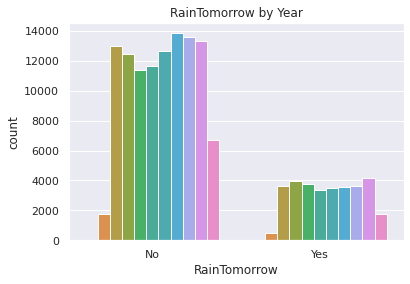

In [47]:
plot = sns.countplot(x=data_date['RainTomorrow'], hue=data_date['Year'])
plot.legend_.remove()
plot.set_title('RainTomorrow by Year');

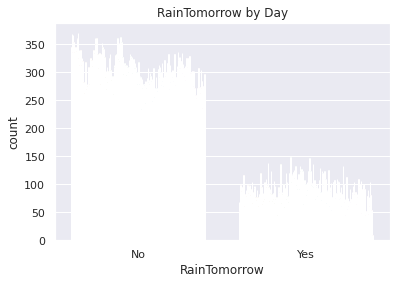

In [48]:
plot = sns.countplot(x=data_date['RainTomorrow'], hue=data_date['Dayofyear'])
plot.legend_.remove()
plot.set_title('RainTomorrow by Day');

In [49]:
#Se definen las funciones que realizaran la codificacion de la fecha

def encode_date_quarter(X):
    X['Quarter'] = pd.DatetimeIndex(X['Date']).quarter
    X.drop(['Date'], 1, inplace=True)
    
    ohe_encoder = OneHotEncoder(categories='auto', drop=None, sparse=False)
    ohe_encoder.fit(X['Quarter'].values.reshape(-1, 1))
    cat_names = np.concatenate(ohe_encoder.categories_).ravel()
    
    X_encoded = ohe_encoder.transform(X['Quarter'].values.reshape(-1, 1))
    new_df = pd.DataFrame(X_encoded,columns=cat_names).astype(int)
    X.drop('Quarter', 1, inplace=True)
    X = pd.concat([X.reset_index(),new_df],axis=1)
    X.drop(['index'], 1, inplace=True)
    
def encode_date_month(X):
    X['Month'] = pd.DatetimeIndex(X['Date']).month
    X.drop(['Date'], 1, inplace=True)
    
    ohe_encoder = OneHotEncoder(categories='auto', drop=None, sparse=False)
    ohe_encoder.fit(X['Month'].values.reshape(-1, 1))
    cat_names = np.concatenate(ohe_encoder.categories_).ravel()
    
    X_encoded = ohe_encoder.transform(X['Month'].values.reshape(-1, 1))
    new_df = pd.DataFrame(X_encoded,columns=cat_names).astype(int)
    X.drop('Month', 1, inplace=True)
    X = pd.concat([X.reset_index(),new_df],axis=1)
    X.drop(['index'], 1, inplace=True)
    
def encode_date_year(X):
    X['Year'] = pd.DatetimeIndex(X['Date']).year
    X['Year'] = X.apply(lambda row: row['Year'] - 2008, axis=1)

    
def encode_date_month_angular(X):
    
    X['Month'] = pd.DatetimeIndex(X['Date']).month
    X.drop(['Date'], 1, inplace=True)

    degs = np.arange(12)*360/12
    X['MonthX'] = X.apply(lambda row : np.cos(radians(degs[row['Month']-1])), axis = 1)
    X['MonthY'] = X.apply(lambda row : np.sin(radians(degs[row['Month']-1])), axis = 1)
    X.drop('Month', 1, inplace=True)
    
def encode_date_quarter_angular(X):
    
    X['Quarter'] = pd.DatetimeIndex(X['Date']).quarter
    X.drop(['Date'], 1, inplace=True)

    degs = np.arange(4)*360/4
    X['QuarterX'] = X.apply(lambda row : np.cos(radians(degs[row['Quarter']-1])), axis = 1)
    X['QuarterY'] = X.apply(lambda row : np.sin(radians(degs[row['Quarter']-1])), axis = 1)
    X.drop('Quarter', 1, inplace=True)

In [50]:
encode_date_quarter_angular(X_train)

In [51]:
X_train.fillna('Missing', inplace = True)

In [52]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Latitude,Longitude,QuarterX,QuarterY
35718,15.2,24.3,2.6,3.2,9.8,NW,69.0,WNW,WNW,15.0,...,1007.1,6.0,2.0,18.0,21.9,Yes,-33.949894,151.181968,6.123234e-17,1.000000e+00
100414,8.4,14.4,7.2,0.2,0.1,NW,81.0,N,NNW,33.0,...,997.4,8.0,8.0,12.6,13.9,Yes,-37.824670,140.782007,6.123234e-17,1.000000e+00
139141,17.4,30.3,0.0,5.4,8.7,E,33.0,ENE,NNW,17.0,...,1012.6,2.0,6.0,22.9,27.1,No,-12.460440,130.841047,-1.000000e+00,1.224647e-16
104531,4.4,22.3,0.0,4.8,10.0,NNW,33.0,NNE,NNW,6.0,...,1020.5,1.0,3.0,16.1,21.8,No,-34.469335,138.993901,-1.000000e+00,1.224647e-16
33760,14.2,27.0,0.2,9.2,5.2,NW,74.0,N,NE,26.0,...,998.1,7.0,5.0,17.9,22.6,No,-33.949894,151.181968,-1.000000e+00,1.224647e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78976,14.0,22.9,0.2,5.4,9.2,W,69.0,WNW,SSW,15.0,...,1006.9,4.0,6.0,19.2,17.8,No,-37.711002,145.083635,-1.836970e-16,-1.000000e+00
9282,8.3,21.2,0.0,2.6,10.2,SSW,28.0,W,E,7.0,...,1012.3,0.0,0.0,18.2,20.1,No,-30.296241,153.113529,-1.000000e+00,1.224647e-16
12575,9.6,20.9,0.0,3.8,0.1,NNE,35.0,NE,NNW,19.0,...,1014.8,7.0,8.0,16.0,18.8,No,-29.461720,149.840715,6.123234e-17,1.000000e+00
22420,11.6,18.8,0.0,2.6,4.7,E,26.0,E,E,9.0,...,1023.4,2.0,7.0,16.7,17.4,No,-29.028958,167.958729,-1.000000e+00,1.224647e-16


#### Wind direction encoding

In [53]:
wind_direction_dict = {'W':12/16, 'NNW':15/16, 'SE':6/16, 'ENE':3/16, 'SW':10/16, 'SSE':7/16, 'S':8/16, 'NE':2/16, 'SSW':9/16, 'N':0, 'ESE':5/16, 'E':4/16,
 'NW':14/16, 'WNW':13/16, 'NNE':1/16,'WSW':11/16}

def encode_wind_angle(X):
    wind_columns=['WindGustDir','WindDir9am','WindDir3pm']
    for column in wind_columns:
        X[column] = X.apply(lambda row : wind_direction_dict[row[column]], axis = 1)

def encode_wind_sin_cos(X):
    wind_columns=['WindGustDir','WindDir9am','WindDir3pm']

    for column in wind_columns:
     
        X[column + 'X'] = X.apply(lambda row : np.cos(radians(wind_direction_dict[row[column]])), axis = 1)
        X[column + 'Y'] = X.apply(lambda row : np.sin(radians(wind_direction_dict[row[column]])), axis = 1)
        X.drop(column, 1, inplace=True)


In [54]:
encode_wind_sin_cos(X_train)

In [55]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Latitude,Longitude,QuarterX,QuarterY,WindGustDirX,WindGustDirY,WindDir9amX,WindDir9amY,WindDir3pmX,WindDir3pmY
35718,15.2,24.3,2.6,3.2,9.8,69.0,15.0,31.0,66.0,30.0,...,-33.949894,151.181968,6.123234e-17,1.000000e+00,0.999883,0.015271,0.999899,0.014180,0.999899,0.014180
100414,8.4,14.4,7.2,0.2,0.1,81.0,33.0,37.0,87.0,87.0,...,-37.824670,140.782007,6.123234e-17,1.000000e+00,0.999883,0.015271,1.000000,0.000000,0.999866,0.016362
139141,17.4,30.3,0.0,5.4,8.7,33.0,17.0,22.0,66.0,54.0,...,-12.460440,130.841047,-1.000000e+00,1.224647e-16,0.999990,0.004363,0.999995,0.003272,0.999866,0.016362
104531,4.4,22.3,0.0,4.8,10.0,33.0,6.0,13.0,55.0,29.0,...,-34.469335,138.993901,-1.000000e+00,1.224647e-16,0.999866,0.016362,0.999999,0.001091,0.999866,0.016362
33760,14.2,27.0,0.2,9.2,5.2,74.0,26.0,30.0,43.0,50.0,...,-33.949894,151.181968,-1.000000e+00,1.224647e-16,0.999883,0.015271,1.000000,0.000000,0.999998,0.002182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78976,14.0,22.9,0.2,5.4,9.2,69.0,15.0,28.0,68.0,64.0,...,-37.711002,145.083635,-1.836970e-16,-1.000000e+00,0.999914,0.013090,0.999899,0.014180,0.999952,0.009817
9282,8.3,21.2,0.0,2.6,10.2,28.0,7.0,13.0,62.0,38.0,...,-30.296241,153.113529,-1.000000e+00,1.224647e-16,0.999952,0.009817,0.999914,0.013090,0.999990,0.004363
12575,9.6,20.9,0.0,3.8,0.1,35.0,19.0,11.0,62.0,62.0,...,-29.461720,149.840715,6.123234e-17,1.000000e+00,0.999999,0.001091,0.999998,0.002182,0.999866,0.016362
22420,11.6,18.8,0.0,2.6,4.7,26.0,9.0,17.0,67.0,66.0,...,-29.028958,167.958729,-1.000000e+00,1.224647e-16,0.999990,0.004363,0.999990,0.004363,0.999990,0.004363


#### True/False Encoding

In [56]:
def encode_raintoday(X):
    yes_no_dict = {'Yes': 1, 'No': 0}
    X['RainToday'] = X.apply(lambda row : yes_no_dict[row['RainToday']], axis = 1)

In [57]:
y = y == 'Yes'
# def encode_raintomorrow(y):
#     yes_no_dict = {'Yes': 1, 'No': 0}
#     y = yes_no_dict[y]

# encode_binary(y_train)
# encode_binary(X_train)

In [58]:
X_test

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
118064,2010-03-12,PerthAirport,28.6,41.1,0.0,11.4,7.7,NNE,43.0,NE,...,17.0,19.0,12.0,1017.6,1013.7,6.0,4.0,31.5,40.8,No
102816,2009-09-21,Nuriootpa,5.3,15.8,0.8,10.2,2.3,WNW,74.0,ENE,...,20.0,57.0,78.0,1008.7,993.6,8.0,8.0,12.2,13.5,No
92725,2015-12-19,GoldCoast,19.5,28.8,0.0,NaN,NaN,ENE,28.0,SE,...,19.0,59.0,56.0,1017.6,1015.8,NaN,NaN,27.7,26.7,No
59376,2012-05-18,Bendigo,3.4,18.9,0.0,NaN,NaN,N,30.0,E,...,22.0,81.0,36.0,NaN,1020.7,7.0,3.0,8.1,18.6,No
27475,2009-11-05,Richmond,16.2,23.9,0.6,1.9,NaN,ESE,39.0,SSW,...,24.0,77.0,65.0,1020.6,1021.0,NaN,NaN,20.3,20.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59467,2012-08-17,Bendigo,5.8,10.6,9.6,NaN,NaN,SW,48.0,NNW,...,24.0,97.0,82.0,999.3,997.7,8.0,6.0,6.0,9.6,Yes
124883,2011-12-27,SalmonGums,8.7,31.7,0.0,NaN,NaN,SE,50.0,ENE,...,26.0,44.0,22.0,NaN,NaN,NaN,NaN,20.7,30.5,No
113556,2014-07-28,Witchcliffe,13.3,18.2,2.4,NaN,NaN,WNW,43.0,W,...,17.0,69.0,72.0,1020.4,1019.8,NaN,NaN,15.7,16.4,Yes
126637,2016-12-13,SalmonGums,12.6,20.9,14.2,NaN,NaN,SSW,39.0,S,...,20.0,74.0,50.0,NaN,NaN,NaN,NaN,14.5,20.4,Yes


In [59]:
def select_features_mutual_info(X_train, y_train, X_test,k= 'all'):  
    fs = SelectKBest(score_func=mutual_info_regression, k=k )  
    fs.fit(X_train, y_train)  
    X_train_fs = fs.transform(X_train)  
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [60]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
encode_date_month(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

X_train_mi, X_test_mi, mi = select_features_mutual_info(X_train, y_train, X_test)


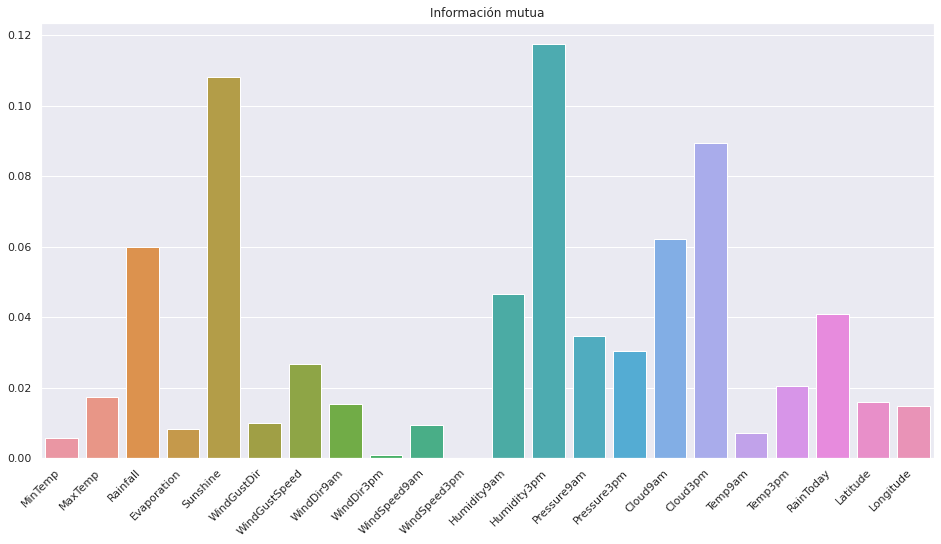

In [61]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
axes.set_title('Información mutua')
sns.barplot( x =X_train.columns.values,y = mi.scores_,ax=axes)
plt.xticks(rotation = 45, ha = 'right');

## 4. Entrenamiento de los modelos

Se pretende ensayar varios modelos diferentes siempre usando LogisticRegression y comparando las tecnicas propuesta con un modelo base rudimentario.

#### Baseline

* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como una variable numerica.
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican con un one-hot del mes.

In [62]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
encode_date_month(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)



In [63]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)


In [64]:
clf1 = LogisticRegression().fit(X_train, y_train)

In [65]:
sc = round(100*clf1.score(X_test, y_test),2)
print("Accuracy: " + str(sc) + "%")

Accuracy: 85.5%


* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como una variable numerica.
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican con un one-hot del trimestr.

In [66]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
encode_date_quarter(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [68]:
clf2 = LogisticRegression().fit(X_train, y_train)

In [69]:
sc2 = round(100*clf2.score(X_test, y_test),2)
print("Accuracy: " + str(sc2) + "%")

Accuracy: 85.5%


* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como una variable numerica.
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el mes

In [70]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
encode_date_month_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [72]:
clf3 = LogisticRegression().fit(X_train, y_train)

In [73]:
sc3 = round(100*clf3.score(X_test, y_test),2)
print("Accuracy: " + str(sc3) + "%")

Accuracy: 85.44%


* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como una variable numerica.
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre

In [74]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [76]:
clf4 = LogisticRegression().fit(X_train, y_train)

In [77]:
sc4 = round(100*clf4.score(X_test, y_test),2)
print("Accuracy: " + str(sc4) + "%")

Accuracy: 85.45%


* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como una variable numerica.
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se agrega dato del año como offset desde el inicio de la toma de mediciones

In [78]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
encode_date_year(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [80]:
clf5 = LogisticRegression().fit(X_train, y_train)

In [81]:
sc5 = round(100*clf5.score(X_test, y_test),2)
print("Accuracy: " + str(sc5) + "%")

Accuracy: 85.51%


* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como una variable numerica.
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Se elimina cualquier informacion temporal

In [82]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_angle(X)
X.drop(['Date'], 1, inplace=True)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [83]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [84]:
clf6 = LogisticRegression().fit(X_train, y_train)

In [85]:
sc6 = round(100*clf6.score(X_test, y_test),2)
print("Accuracy: " + str(sc6) + "%")

Accuracy: 85.5%


* Se eliminan todos las entradas con elementos faltantes.
* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre

In [86]:
X, y = dataset_clean(data)
X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [88]:
clf7 = LogisticRegression().fit(X_train, y_train)

In [89]:
sc7 = round(100*clf7.score(X_test, y_test),2)
print("Accuracy: " + str(sc7) + "%")

Accuracy: 85.55%


* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se imputan todas las variables numericas por la media, luego se eliminan todos las entradas con elementos faltantes.

In [90]:
X, y = dataset_clean(data)

# impute_mode(X, cols)
impute_mean(X, ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'])
X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [92]:
clf8 = LogisticRegression().fit(X_train, y_train)

In [93]:
sc8 = round(100*clf8.score(X_test, y_test),2)
print("Accuracy: " + str(sc8) + "%")

Accuracy: 85.15%


* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se imputan las variables categoricas 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' por la moda, luego se eliminan todos las entradas con elementos faltantes.

In [94]:
X, y = dataset_clean(data)

impute_mode(X, ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
# impute_mean(X, ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'])
X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)



In [95]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [96]:
clf9 = LogisticRegression().fit(X_train, y_train)

In [97]:
sc9 = round(100*clf9.score(X_test, y_test),2)
print("Accuracy: " + str(sc9) + "%")

Accuracy: 85.67%


* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se imputan las variables categoricas 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' por la moda y las numericas por una constante, luego se eliminan todos las entradas con elementos faltantes.

In [98]:
X, y = dataset_clean(data)

impute_mode(X, ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
impute_constant(X, ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], -1)
impute_constant(X, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'], 999)
X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [99]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [100]:
clf10 = LogisticRegression().fit(X_train, y_train)

In [101]:
sc10 = round(100*clf10.score(X_test, y_test),2)
print("Accuracy: " + str(sc10) + "%")

Accuracy: 83.86%


* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se imputan las variables categoricas 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' por la moda 
* Se eliminan las columnas 'Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm', luego se eliminan todos las entradas con elementos faltantes.

In [102]:
X, y = dataset_clean(data)

impute_mode(X, ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
delete_incomplete_columns(X, ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'])
# impute_mean(X, ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm'])
# impute_mean(X, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)



In [103]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [104]:
clf11 = LogisticRegression().fit(X_train, y_train)

In [105]:
sc11 = round(100*clf11.score(X_test, y_test),2)
print("Accuracy: " + str(sc11) + "%")

Accuracy: 85.17%


* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se imputan las variables categoricas 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' por la moda 
* Se eliminan las columnas 'Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm', luego se eliminan todos las entradas con elementos faltantes.
* Se descartan las variables 'Temp9am' y 'Temp3pm'

In [106]:
X, y = dataset_clean(data)

impute_mode(X, ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
delete_incomplete_columns(X, ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'])
# impute_mean(X, ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm'])
# impute_mean(X, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
X.drop(['Temp9am'], 1, inplace=True)
X.drop(['Temp3pm'], 1, inplace=True)

X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [108]:
clf12 = LogisticRegression().fit(X_train, y_train)

In [109]:
sc12 = round(100*clf12.score(X_test, y_test),2)
print("Accuracy: " + str(sc12) + "%")

Accuracy: 85.14%


* Las direcciones del viento se codifican como un angulo, representado por su seno y coseno 
* Las ubicaciones se codifican como variables numericas: latitud y longitud.
* Las fechas se codifican como un angulo representando el trimestre
* Se imputan las variables categoricas 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday' por la moda 
* Se eliminan las columnas 'Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm', luego se eliminan todos las entradas con elementos faltantes.
* Se descartan las variables 'Temp9am' y 'Temp3pm'
* Se descarta la variable 'Humidity9am'

In [110]:
X, y = dataset_clean(data)

impute_mode(X, ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
delete_incomplete_columns(X, ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'])
# impute_mean(X, ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm'])
# impute_mean(X, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
X.drop(['Temp9am'], 1, inplace=True)
X.drop(['Temp3pm'], 1, inplace=True)
X.drop(['Humidity9am'], 1, inplace=True)
# X.drop(['Humidity3pm'], 1, inplace=True)

X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [112]:
clf13 = LogisticRegression().fit(X_train, y_train)

In [113]:
sc13 = round(100*clf13.score(X_test, y_test),2)
print("Accuracy: " + str(sc13) + "%")

Accuracy: 85.2%


In [121]:
X, y = dataset_clean(data)

impute_mode(X, ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
# delete_incomplete_columns(X, ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'])
# impute_mean(X, ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm'])
# impute_mean(X, ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])
X.drop(['Temp9am'], 1, inplace=True)
X.drop(['Temp3pm'], 1, inplace=True)
X.drop(['Humidity9am'], 1, inplace=True)
X.drop(['Pressure9am'], 1, inplace=True)

# X.drop(['Humidity3pm'], 1, inplace=True)

X, y = delete_missing_values(X, y)

encode_wind_sin_cos(X)
encode_date_quarter_angular(X)
encode_location(X)

encode_raintoday(X)
# encode_raintomorrow(y)
y = y == 'Yes'

X_train, X_test, y_train, y_test = dataset_split(X, y)

In [115]:
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
    return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)
X_test = zscore(X_test)

In [116]:
clf14 = LogisticRegression().fit(X_train, y_train)

In [117]:
sc14 = round(100*clf14.score(X_test, y_test),2)
print("Accuracy: " + str(sc14) + "%")

Accuracy: 85.71%


In [118]:
X_train_mi, X_test_mi, mi = select_features_mutual_info(X_train, y_train, X_test)


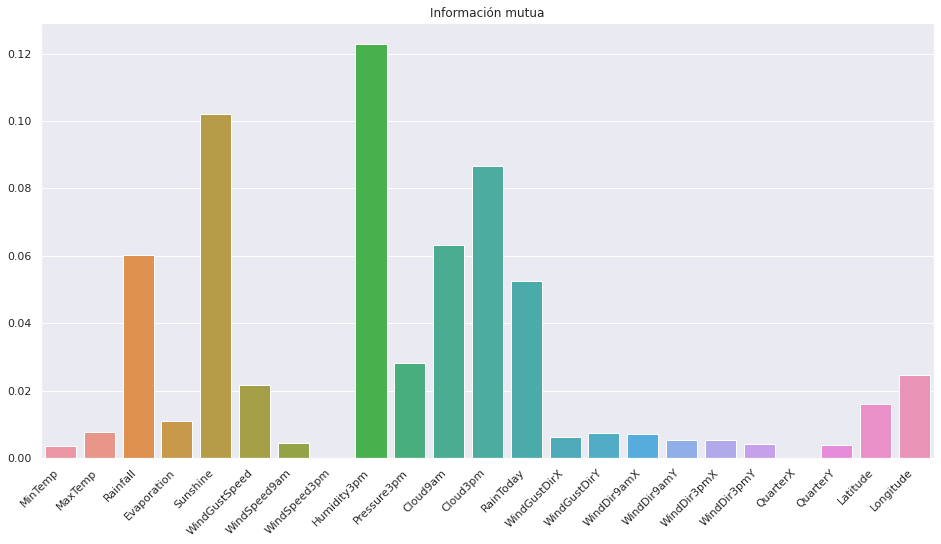

In [122]:
fig,axes = plt.subplots(1,1,figsize=(16,8))
axes.set_title('Información mutua')
sns.barplot( x =X_train.columns.values,y = mi.scores_,ax=axes)
plt.xticks(rotation = 45, ha = 'right');

## 5. Evaluación de resultados 
Se presentan los resultados del modelo con mejor performance obtenido.

In [120]:
y_pred = clf14.predict(X_test)


TP = np.sum(y_test & y_pred)
TN = np.sum((y_test == False) & (y_pred == False))
FN = np.sum((y_test == True) & (y_pred == False))
FP = np.sum((y_test == False) & (y_pred == True))

print("TP: " + str(TP))
print("TN: " + str(TN))
print("FN: " + str(FN))
print("FP: " + str(FP))
print("\n")

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

TP: 2089
TN: 12882
FN: 1741
FP: 756


Precision: 0.73
Recall: 0.55
Accuracy: 0.86
